Disciplina: SCC5948_Ciência_de_dados

Normando de Campos Amazonas Filho

NUSP: 11561949

# Transformações em dados heterogêneos


In [ ]:
import pandas as pd
import numpy as np

### Parte 1
Nessa primeira parte, vamos utilizar o conjunto de dados Iris com modificações (`iris_modif.data`).

In [ ]:
iris = pd.read_csv('iris_modif.data', header=None, index_col=0)
iris

,1,2,3,4,5,6
0,,,,,,
0,4.9,3.0,49.0,1.4,0.2,Iris-setosa
1,4.7,3.2,47.0,1.3,0.2,Iris-setosa
2,4.6,3.1,46.0,1.5,0.2,Iris-setosa
3,5.0,3.6,50.0,1.4,0.2,Iris-setosa
4,5.4,3.9,54.0,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
153,67.0,33.0,670.0,57.0,21.0,Iris-virginica
154,79.0,38.0,790.0,64.0,20.0,Iris-virginica
155,61.0,28.0,610.0,47.0,12.0,Iris-versicolor


### Questão 01.

* Utilizando as técnicas de visualização apresentadas até agora, verifique para cada atributo se existem outliers interpretando sua vizualização.
* Aplique a técnica de Winsorização nos atributos que possuem outliers utilizando o 5º e 90º percentil do atributo dentro da classe que o exemplo pertence como limite inferior e superior respectivamente.
* Calcule a cerca inferior (LF) e superior (UF) para cada um dos atributos. Substitua o valor dos outliers pela cerca mais próxima. Para ser considerados outliers, os valores devem estar além das cercas inferior ou superior.
* Compare os resultados obtidos para cada atributo com os obtidos pela tec. de Winsorização.


In [ ]:
import matplotlib.pyplot as plt

# Função auxiliar para visualização
def hist_and_boxplot(df, attr_name):

  fig, axes = plt.subplots(1, 2)

  df[attr_name].hist(ax=axes[0])
  df.boxplot(column=attr_name, ax=axes[1])

  fig.suptitle(f'Atributo {attr_name}', fontsize=10)


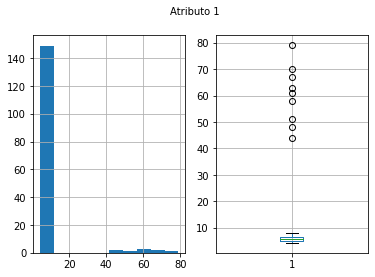

In [ ]:
hist_and_boxplot(iris, 1)

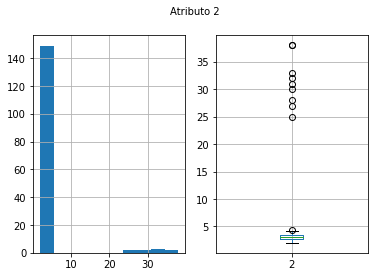

In [ ]:
hist_and_boxplot(iris, 2)

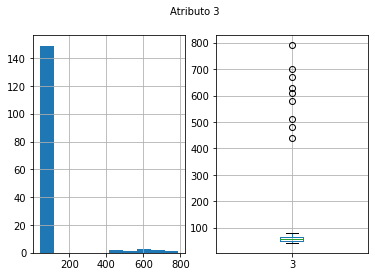

In [ ]:
hist_and_boxplot(iris, 3)

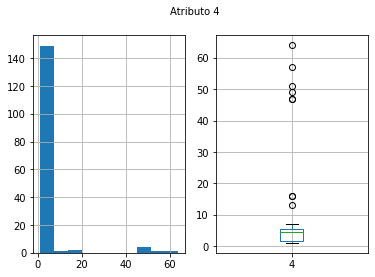

In [ ]:
hist_and_boxplot(iris, 4)

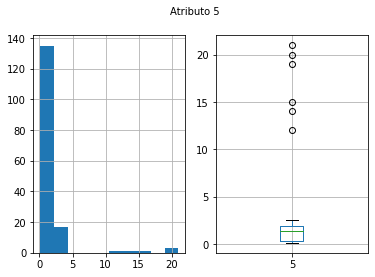

In [ ]:
hist_and_boxplot(iris, 5)

### Detecção de outliers via histogramas e boxplot

Analisando tanto os histogramas quanto os boxplots de todos os atributos, é fácil observar a presença de valores cujas magnitudes são superiores aos demais. Pelo histograma observamos barras que ficam isoladas a direita das demais. Já pelo boxplot, a ferramenta de plot do Pandas identifica outliers como pontos, e todos os atributos possuem pontos acima da cerca superior (Q3 + 1.5 x IQR).

<!-- - Atributo 1: muitos outliers acima da cerca superior
- Atributo 2: idem atributo 1
- Atributo 3: idem atributo 1
- Atributo 4: idem atributo 1
- Atributo 5: idem atributo 1 -->


### Limitando dentro das cercas LF e UF

In [ ]:
def lf_uf(df, nome_attr):

  df = df.copy(deep=True)

  samples = df[nome_attr]

  Q1 = samples.quantile(0.25)
  Q3 = samples.quantile(0.75)
  IQR = Q3 - Q1

  LF = Q1 - 1.5*IQR
  UF = Q3 + 1.5*IQR

  print(f"LF: {LF} // UF: {UF}")

  # Determinando indices a serem modificados
  lower_than_LF = df[nome_attr] < LF
  greater_than_UF = df[nome_attr] > UF

  # Modificando valores
  df.loc[lower_than_LF, nome_attr] = LF
  df.loc[greater_than_UF, nome_attr] = UF

  return df

### Winsorização

In [ ]:
def winsorizacao(df, nome_attr):

  df = df.copy(deep=True)

  # filtrar por classe
  for label in df[6].unique():

    filtered_df = df[df[6] == label]
    samples = filtered_df[nome_attr]

    # print((samples))

    lower_bound = samples.quantile(0.05)
    upper_bound = samples.quantile(0.90)

    print(f"Para a classe {label}")
    print(f"\t - Limite inferior: {lower_bound} // Limite superior: {upper_bound}")

    # Determinando indices a serem modificados
    lower_than_LF = filtered_df[filtered_df[nome_attr] < lower_bound].index
    greater_than_UF = filtered_df[filtered_df[nome_attr] > upper_bound].index

    # Modificando valores
    df.loc[lower_than_LF, nome_attr] = lower_bound
    df.loc[greater_than_UF, nome_attr] = upper_bound

  return df


### Comparação entre as técnicas

In [ ]:
from scipy import stats

In [ ]:
atributo_de_analise = 5

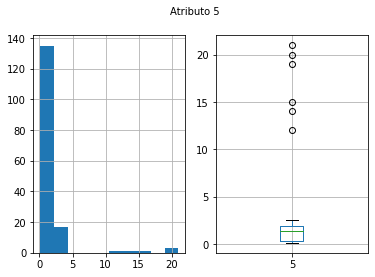

In [ ]:
# original
hist_and_boxplot(iris, atributo_de_analise)

In [ ]:
iris.describe()

,1,2,3,4,5
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,8.939241,4.662025,89.392405,5.837975,1.813924
std,12.892761,6.668087,128.927612,9.657211,3.153594
min,4.300000,2.000000,43.000000,1.000000,0.100000
25%,5.125000,2.800000,51.250000,1.600000,0.325000
50%,5.850000,3.000000,58.500000,4.500000,1.400000
75%,6.500000,3.400000,65.000000,5.300000,1.900000
max,79.000000,38.000000,790.000000,64.000000,21.000000


LF: -2.0374999999999996 // UF: 4.262499999999999
- Obliquidade: 0.8217729978453694


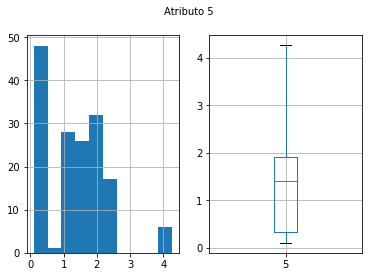

In [ ]:
# Utilizando cercas LF e UF
iris_lfuf = lf_uf(iris, atributo_de_analise)
hist_and_boxplot(iris_lfuf, atributo_de_analise)
# hist_and_boxplot(iris_lfuf[iris_lfuf[6] == "Iris-setosa"], attributo_de_analise)
print(f"- Obliquidade: {stats.skew(iris_lfuf[atributo_de_analise])}")

In [ ]:
iris_lfuf.describe()

,1,2,3,4,5
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,8.939241,4.662025,89.392405,5.837975,1.336551
std,12.892761,6.668087,128.927612,9.657211,0.947768
min,4.300000,2.000000,43.000000,1.000000,0.100000
25%,5.125000,2.800000,51.250000,1.600000,0.325000
50%,5.850000,3.000000,58.500000,4.500000,1.400000
75%,6.500000,3.400000,65.000000,5.300000,1.900000
max,79.000000,38.000000,790.000000,64.000000,4.262500


Para a classe Iris-setosa
	 - Limite inferior: 0.1 // Limite superior: 0.4
Para a classe Iris-versicolor
	 - Limite inferior: 1.0 // Limite superior: 1.6
Para a classe Iris-virginica
	 - Limite inferior: 1.56 // Limite superior: 2.4800000000000004
- Obliquidade: -0.10585198162676197


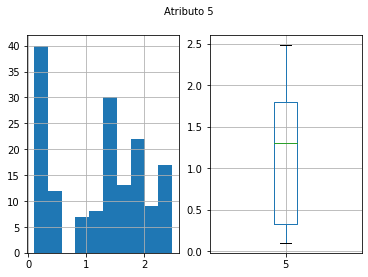

In [ ]:
# Utilizando winsorização

# atributo_de_analise = 3
iris_win = winsorizacao(iris, atributo_de_analise)
hist_and_boxplot(iris_win, atributo_de_analise)
# hist_and_boxplot(iris_win[iris_win[6] == "Iris-setosa"], atributo_de_analise)
print(f"- Obliquidade: {stats.skew(iris_win[atributo_de_analise])}")

In [ ]:
iris_win.describe()

,1,2,3,4,5
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,8.939241,4.662025,89.392405,5.837975,1.219367
std,12.892761,6.668087,128.927612,9.657211,0.770433
min,4.300000,2.000000,43.000000,1.000000,0.100000
25%,5.125000,2.800000,51.250000,1.600000,0.325000
50%,5.850000,3.000000,58.500000,4.500000,1.300000
75%,6.500000,3.400000,65.000000,5.300000,1.800000
max,79.000000,38.000000,790.000000,64.000000,2.480000


### Dicussão

No geral, observa-se que ambas as técnicas cumpriram com sucesso o objetivo de remover outliers. Uma diferença observada entre os resultados é que cada técnica gerou intervalos de valores diferentes (diferentes máximos e mínimos). Porém, a técnica de winsorização gerou distribuições de valores mais "centrados". Este fato fica evidente ao analisar a obliquidade dos valores produzidos pelas duas técnicas, uma vez que os valores produzidos pela técnica de winsorização tem menor módulo de obliquidade em todos os casos. Por fim, a limitação da winsorização é a escolha dos percentis exatos para a eliminação dos outliers.

<!--
- **Atributo 1**: Nota-se que ambas as técnicas cumpriram seu papel de remover os outliers presentes. A diferença mais marcante entras técnicas é que a winsorização produziu uma distribuição de valores mais "centrada" para este atributo. -->

<!-- - **Atributo 1**: Como resultado do processo de Winsorização, nota-se que os outliers apontados como pontos no boxplot do pandas foram removidos. Além disto, devido a remoção de outliers os exemplos de valor alto que ficam a direita do restante dos exemplos foram removidos, resultando em um histograma mais "centrado". Os boxplots, por sua vez, também ficaram mais centrados.

- **Atributo 2**: idem atributo 1.

- **Atributo 3**: idem atributo 1.

- **Atributo 4**: Assim como os anteriores, os valores discrepantes mais a direita da distribuição foram removidos e seu boxplot ficou mais centrado. Observa-se que neste caso ainda há uma grande quantidade de valores com valor inferior a 2.

- **Atributo 5**: idem atributo 4, porém há uma grande concentração de valores inferiores a 1 neste caso. -->


### Questão 02.
* Identifique visualmente ou programaticamente se existem atributos reduntantes nessa base. Caso exista, crie um novo `Dataframe` sem eles.
* **Dica**: Atributos redundantes são aqueles que trazem a mesma informação ou que seja possível calcular um a partir do outro. Por exemplo: Data de aniversário e idade.

### Dicussão

Por inspeção visual, é facil observar que a coluna 3 corresponde aos valores da coluna 1 multiplicados por 10.

In [ ]:
iris.head(10)

,1,2,3,4,5,6
0,,,,,,
0,4.9,3.0,49.0,1.4,0.2,Iris-setosa
1,4.7,3.2,47.0,1.3,0.2,Iris-setosa
2,4.6,3.1,46.0,1.5,0.2,Iris-setosa
3,5.0,3.6,50.0,1.4,0.2,Iris-setosa
4,5.4,3.9,54.0,1.7,0.4,Iris-setosa
5,4.6,3.4,46.0,1.4,0.3,Iris-setosa
6,5.0,3.4,50.0,1.5,0.2,Iris-setosa
7,4.4,2.9,44.0,1.4,0.2,Iris-setosa
8,4.9,3.1,49.0,1.5,0.1,Iris-setosa


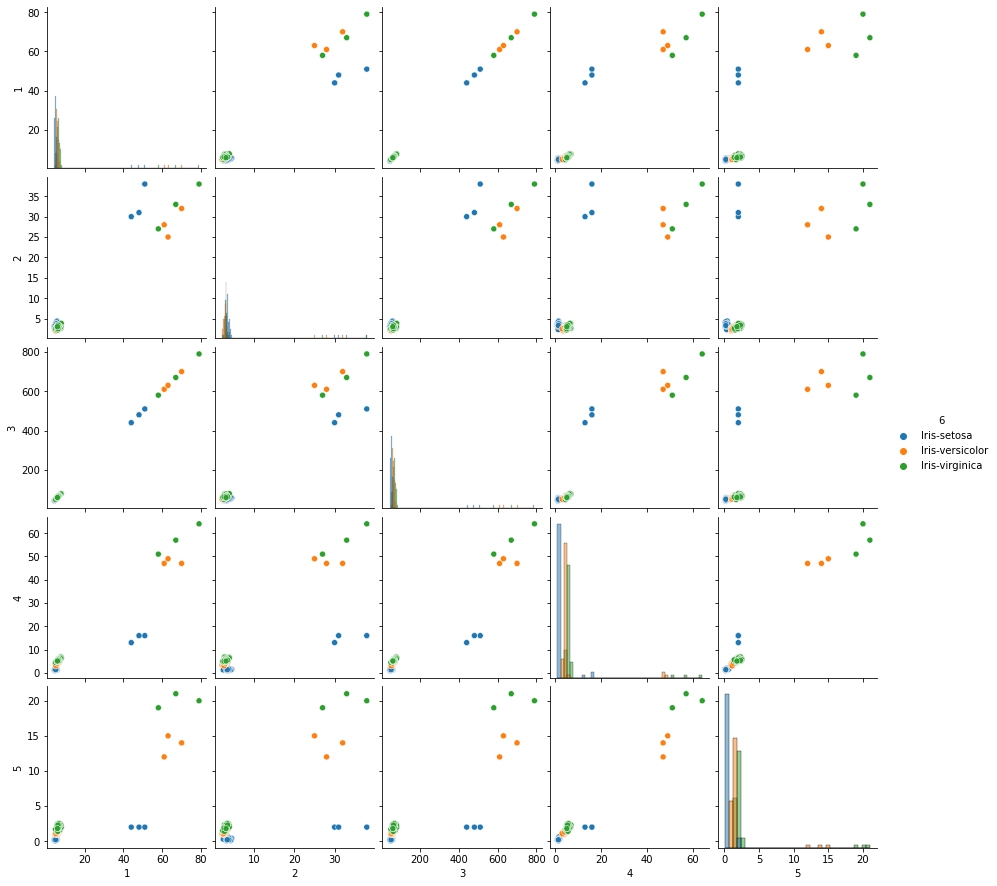

In [ ]:
import seaborn as sns
sns.pairplot(iris, hue=6, diag_kind='hist')

In [ ]:
# o atributo 3 é 10* o atributo 1
new_iris = iris.drop(columns=[3])
new_iris.head(10)

,1,2,4,5,6
0,,,,,
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa


### Questão 03.

*   Assumindo que o atributo '1' segue uma distribuição normal, calcule a probabilidade de uma observação X deste atributo estar no intervalo 5.045 < X < 6.741.
* Verifique quais outros atributos possuem esta mesma probabilidade para valores nesta mesma faixa. Neste caso, eles seguem uma distribuição normal?

In [ ]:
# função auxuliar para aplicar winsorização em todos os atributos
def full_winsorization(df):

  df = df.copy(deep=True)
  columns = [1, 2, 3, 4, 5]

  for col in columns:

    df = winsorizacao(df, col)

  return df

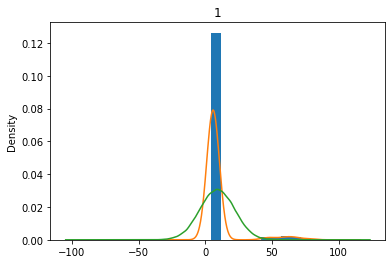

In [ ]:
from scipy.stats import norm

def view(df, nome_attr):
  df.hist(nome_attr, density=1)
  df[nome_attr].plot.kde()
  normal = pd.Series(norm.rvs(df[nome_attr].mean(), df[nome_attr].std(), size=100000))
  normal.plot.kde()

view(iris, 1) #iris com outliers

In [ ]:
iris_win = full_winsorization(iris)

Para a classe Iris-setosa
	 - Limite inferior: 4.4 // Limite superior: 5.68
Para a classe Iris-versicolor
	 - Limite inferior: 5.06 // Limite superior: 6.78
Para a classe Iris-virginica
	 - Limite inferior: 5.76 // Limite superior: 7.7
Para a classe Iris-setosa
	 - Limite inferior: 3.0 // Limite superior: 4.09
Para a classe Iris-versicolor
	 - Limite inferior: 2.26 // Limite superior: 3.2
Para a classe Iris-virginica
	 - Limite inferior: 2.5 // Limite superior: 3.560000000000001
Para a classe Iris-setosa
	 - Limite inferior: 44.0 // Limite superior: 56.8
Para a classe Iris-versicolor
	 - Limite inferior: 50.6 // Limite superior: 67.80000000000001
Para a classe Iris-virginica
	 - Limite inferior: 57.599999999999994 // Limite superior: 77.0
Para a classe Iris-setosa
	 - Limite inferior: 1.2 // Limite superior: 1.7
Para a classe Iris-versicolor
	 - Limite inferior: 3.42 // Limite superior: 4.9
Para a classe Iris-virginica
	 - Limite inferior: 4.86 // Limite superior: 6.680000000000001
Par

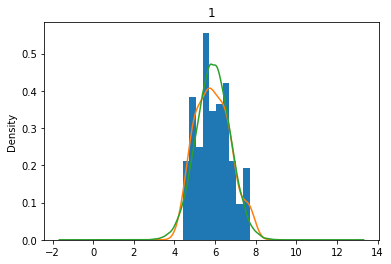

In [ ]:
view(iris_win, 1) # iris sem outliers (winsorização)

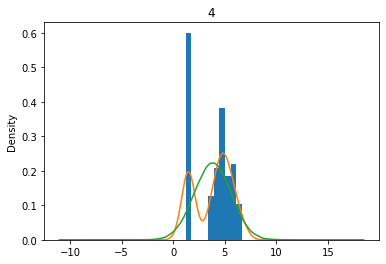

In [ ]:
view(iris_win, 4) # iris sem outliers (winsorização)

In [ ]:
# Sua resposta começa aqui

def questao3(df, atributo_de_analise):

  samples = df[atributo_de_analise].values

  n_examples = len(samples)

  greater_than_lower_bound = samples > 5.045
  lower_than_upper_bound = samples < 6.741

  inside_interval = greater_than_lower_bound & lower_than_upper_bound

  examples_inside_interval = inside_interval.sum()

  return examples_inside_interval / n_examples


In [ ]:
from scipy import stats

In [ ]:
# 1: 0.6582278481012658
# 2: 0.0 (completamente fora do limite inferior)
# 3: 0.0 (completamente fora do limite superior)
# 4: 0.27848101265822783
# 5: 0.0 (completamente fora do limite inferior)
questao3(iris_win, 1)
print("curtose: ", stats.kurtosis(iris_win[1]))
print("obliquidade: ", stats.skew(iris_win[1]))

curtose:  -0.5940108291846089
obliquidade:  0.29331136690885773


### Dicussão

O atributo 1 obteve 65.82% de probabilidade. Os atributos 2, 3 e 5 apresentam valores completamente fora do intervalo proposto, e consequentemente possuem probabilidade 0. O único atributo diferente do 1 que apresentou valores dentro deste intervalo é o 4 (27.84% de probabilidade), porém inferior a probabilidado do atributo 1 devido a escalas de valores diferentes. O atributo 1 apresenta a distribuição mais semelhante à normal, com pico da distribuição um pouco abaixo de uma distribuição normal e com inclinação para esquerda. Estes fatores indicam kurtose negativa e obliquidade positiva respectivamente. A distribuição de valores do atributo 4, por sua vez, não se assemelha a uma normal, pois apresenta dois picos de valores.

### Parte 2
Nos próximos exercícios utilizaremos um dataset com 13 variáveis de entrada e 1 variável de saída (num). O dataset pode ser encontrado no arquivo "clv_heart_disease.csv".
Existem valores faltantes nesse dataset, representados pelo caractere "?".


In [ ]:
# na_values diz para o Pandas qual simbolo representa valores faltantes
dados = pd.read_csv('clv_heart_disease.data', na_values='?')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    float64
 2   sex         303 non-null    object 
 3   cp          303 non-null    object 
 4   trestbps    303 non-null    float64
 5   chol        303 non-null    float64
 6   fbs         303 non-null    float64
 7   restecg     303 non-null    object 
 8   thalach     303 non-null    float64
 9   exang       303 non-null    object 
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    object 
 12  ca          299 non-null    float64
 13  thal        301 non-null    object 
 14  num         303 non-null    int64  
dtypes: float64(7), int64(2), object(6)
memory usage: 35.6+ KB


### Questão 01.

*   Crie uma lista com o nome das variáveis numéricas e uma com o nome das variáveis categóricas

In [ ]:
dados.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63.0,male,Typical Angina,145.0,233.0,133.051002,Left ventricular hypertrophy,150.0,no,2.3,Downsloping,0.0,Fixed defect,0
1,1,67.0,male,Asymptomatic,160.0,286.0,106.803350,Left ventricular hypertrophy,108.0,yes,1.5,Flat,3.0,Normal,1
2,2,67.0,male,Asymptomatic,120.0,229.0,105.341447,Left ventricular hypertrophy,129.0,yes,2.6,Flat,2.0,Reversable defect,1
3,3,37.0,male,Non-anginal pain,130.0,250.0,102.194825,Normal,187.0,no,3.5,Downsloping,0.0,Normal,0
4,4,41.0,female,Atypical Angine,130.0,204.0,110.926185,Left ventricular hypertrophy,172.0,no,1.4,Upsloping,0.0,Normal,0


In [ ]:
# Criamos um vetor com o nome das classes desejadas
features_numericos = ["age", "trestbps", "chol", "fbs", "thalach", "oldpeak", "ca"] # não incluir num pois é a variável "classe"
features_categoricos = ["sex", "cp", "restecg", "exang", "slope", "thal"]

### Questão 02.

*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média.

*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Seu código começa aqui
transform = ColumnTransformer(
    transformers=[
        ('numéricos', SimpleImputer(strategy='mean'), features_numericos),
        ('categóricos', SimpleImputer(strategy='most_frequent'), features_categoricos),
    ]
)

In [ ]:
raw_values = transform.fit_transform(dados)

In [ ]:
raw_values

array([[63.0, 145.0, 233.0, ..., 'no', 'Downsloping', 'Fixed defect'],
       [67.0, 160.0, 286.0, ..., 'yes', 'Flat', 'Normal'],
       [67.0, 120.0, 229.0, ..., 'yes', 'Flat', 'Reversable defect'],
       ...,
       [57.0, 130.0, 131.0, ..., 'yes', 'Flat', 'Reversable defect'],
       [57.0, 130.0, 236.0, ..., 'no', 'Flat', 'Normal'],
       [38.0, 138.0, 175.0, ..., 'no', 'Upsloping', 'Normal']],
      dtype=object)

In [ ]:
raw_values_with_labels = np.c_[raw_values, dados['num']]

In [ ]:
columns = features_numericos[:] # fazendo uma cópia
columns.extend(features_categoricos)
columns.append("num")

In [ ]:
novos_dados = pd.DataFrame(raw_values_with_labels, columns=columns)

In [ ]:
novos_dados.head()

,age,trestbps,chol,fbs,thalach,oldpeak,ca,sex,cp,restecg,exang,slope,thal,num
0,63,145,233,133.051,150,2.3,0,male,Typical Angina,Left ventricular hypertrophy,no,Downsloping,Fixed defect,0
1,67,160,286,106.803,108,1.5,3,male,Asymptomatic,Left ventricular hypertrophy,yes,Flat,Normal,1
2,67,120,229,105.341,129,2.6,2,male,Asymptomatic,Left ventricular hypertrophy,yes,Flat,Reversable defect,1
3,37,130,250,102.195,187,3.5,0,male,Non-anginal pain,Normal,no,Downsloping,Normal,0
4,41,130,204,110.926,172,1.4,0,female,Atypical Angine,Left ventricular hypertrophy,no,Upsloping,Normal,0


In [ ]:
novos_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       303 non-null    object
 1   trestbps  303 non-null    object
 2   chol      303 non-null    object
 3   fbs       303 non-null    object
 4   thalach   303 non-null    object
 5   oldpeak   303 non-null    object
 6   ca        303 non-null    object
 7   sex       303 non-null    object
 8   cp        303 non-null    object
 9   restecg   303 non-null    object
 10  exang     303 non-null    object
 11  slope     303 non-null    object
 12  thal      303 non-null    object
 13  num       303 non-null    object
dtypes: object(14)
memory usage: 33.3+ KB


### Questão 03.

*     ***Utilizando apenas os atributos numéricos do exercício anterior***, calcule todos os componentes principais utilizando PCA  (`sklearn.decomposition.PCA`) e depois selecione apenas os componentes necessários para explicar 80% da variância do sub-conjunto de atributos numéricos.

*   Exiba os componentes principais em uma tabela.

In [ ]:
dados_numericos = features_numericos[:]

In [ ]:
from sklearn.decomposition import PCA

values = novos_dados[dados_numericos].values

In [ ]:
values = novos_dados[dados_numericos].values
values

array([[63.0, 145.0, 233.0, ..., 150.0, 2.3, 0.0],
       [67.0, 160.0, 286.0, ..., 108.0, 1.5, 3.0],
       [67.0, 120.0, 229.0, ..., 129.0, 2.6, 2.0],
       ...,
       [57.0, 130.0, 131.0, ..., 115.0, 1.2, 1.0],
       [57.0, 130.0, 236.0, ..., 174.0, 0.0, 1.0],
       [38.0, 138.0, 175.0, ..., 173.0, 0.0, 0.6722408026755853]],
      dtype=object)

In [ ]:
pca = PCA()
pca.fit(values)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.components_.shape

(7, 7)

In [ ]:
pca.explained_variance_ratio_

array([7.23143993e-01, 1.45383489e-01, 8.39281491e-02, 3.14867273e-02,
       1.55545228e-02, 3.27798612e-04, 1.75319777e-04])

### Analisando variâncias

In [ ]:
print(f"Variância em função do número de componentes:")
for i in range(1, len(features_numericos)+1):
  current_variance = pca.explained_variance_ratio_[:i].sum()
  print(f"- pct: {current_variance} para {i} variáveis.")

Variância em função do número de componentes:
- pct: 0.7231439931893807 para 1 variáveis.
- pct: 0.8685274824002079 para 2 variáveis.
- pct: 0.952455631489858 para 3 variáveis.
- pct: 0.9839423587657818 para 4 variáveis.
- pct: 0.9994968816104196 para 5 variáveis.
- pct: 0.9998246802228439 para 6 variáveis.
- pct: 0.9999999999999999 para 7 variáveis.


### Dicussão

Analisando as variâncias associadas a quantidade de componentes utilizadas, conclui-se que são necessários apenas dois componentes principais para captar 80% da variância dos dados.

### Componentes principais


In [ ]:
components_df = pd.DataFrame(pca.components_, columns=[f"v{i}" for i in range(1, 8)])

In [ ]:
components_df

,v1,v2,v3,v4,v5,v6,v7
0,0.038461,0.050658,0.997865,0.014128,-0.003822,0.001161,0.002209
1,0.181431,0.110091,-0.016906,0.038070,-0.976101,0.017982,0.011423
2,0.125568,0.965793,-0.055748,0.169312,0.140041,0.008843,0.003517
3,0.029045,-0.179908,-0.005835,0.982904,0.023684,0.001523,0.009540
4,0.973718,-0.141702,-0.028932,-0.059082,0.163490,-0.001586,0.027096
5,-0.013343,-0.009528,-0.000725,-0.006740,0.017600,0.931635,0.362536
6,-0.026220,0.004556,-0.000765,-0.006865,-0.000398,-0.362835,0.931448
